# Assignment 2 - Landon Burleson 
## Problem 1
As described in the assignment document, this problem will discuss the derivation of the update rule
using the sigmoid activation function and the Mean Squared loss function. See the following LaTex
equations below for a step-by-step guide through the described derivation. 

The following equation is the Mean Square Error (MSE) Loss function used for this derivation:

$$MSE (L) = \frac{1}{n} \sum_{i = 1}^{n}(h_\theta(x^{(i)}) - y^{(i)})^2$$

The MSE derivative used for backpropagation and gradient descent is defined below:

$$ \frac{\partial L}{\partial Y} = \frac{2}{n} [y_1 - y_1^* \cdots y_i - y_i^*]$$

$$ = \frac{2}{n} (Y - Y*) $$

To capture the Loss with respect to a set of weights for a given layer in the network, the following chain rule is used:

$$ \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2} * \frac{\partial a_2}{\partial z_2} * \frac{\partial z_2}{\partial w_2}$$

To match nomenclature going forward, notice the following equation ($a_2$ represents the activation function output from the output layer of the neural network):

$$ \frac{\partial L}{\partial a_2} = \frac{2}{n}(a_2 - \hat{y})$$

The sigmoid function used for the activation function within this example is shown below:

$$g = \sigma(x) = \frac{1}{1+e^x}$$

The derivative of the sigmoid function is shown here:
$$ g' = \frac{\partial\sigma}{\partial x} = \frac{e^{-x}}{(1+e^{-x})^2}$$

For a linear activation function, the following equations are utilized for NN operations: 

$$ g = x $$

The dervivative is simply 1 for this activation function. 

Utilizing the above equations for the linear activation function since the linear activation function is used for the output of this neural network, the following relationship can be found:
$$ a_2 = g'(z_2) $$
$$ \frac{\partial a_2}{\partial z_2} = 1$$

Finally, to get the final term for the chain rule, use the following equations:
$$z_2 = W_2*a_1 + b_2$$
$$ \frac{\partial z_2}{\partial w_2} = a_1$$

With the above equations, the $\frac{\partial L}{\partial W_2}$ term equals: 
$$ \frac{\partial L}{\partial W_2} = 2(a_2 - \hat{y}) \cdot a_1 $$

Similarly, the $\frac{\partial L}{\partial b_2}$ term is found with: 

$$ \frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial a_2} * \frac{\partial a_2}{\partial z_2} * \frac{\partial z_2}{\partial b_2}$$

Giving us this result: 

$$\frac{\partial L}{\partial b_2} = 2(a_2 - \hat{y}) \cdot a_2(1-a_2) $$

The update rule equations via gradient descent are shown below for both the W and b parameters:
$$ W_2 = W_2 - \alpha \cdot \frac{\partial L}{\partial W_2} $$
$$ b_2 = b_2 - \alpha \cdot \frac{\partial L}{\partial b_2} $$

To find the $W_1$ and $b_1$ terms, utilize the chain rule again:

$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_2} * \frac{\partial a_2}{\partial z_2} * \frac{\partial z_2}{\partial a_1} * \frac{\partial a_1}{\partial z_1} * \frac{z_1}{W_1}$$

and

$$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial a_2} * \frac{\partial a_2}{\partial z_2} * \frac{\partial z_2}{\partial a_1} * \frac{\partial a_1}{\partial z_1} * \frac{\partial z_1}{\partial b_1}$$

The following relationships are used to find the rest of the parameters:

$$ a_1 = g(z_1) $$
$$ z_1 = W_1 * x + b_1$$

$$ \frac{\partial a_1}{\partial z_1} = a_1^2 * e^{-z_1}$$
$$\frac{\partial a_1}{\partial z_1} = a_1(1 - a_1)$$

$$ \frac{\partial z_1}{\partial W_1} = a_1 $$

Giving us the following output: 
$$\frac{\partial L}{\partial W_1} = 2(a_1 - \hat{y}) \cdot W_2 \cdot a_1(1 - a_1) \cdot X$$

$$\frac{\partial L}{\partial b_1} = 2(a_1 - \hat{y}) \cdot W_2 \cdot a_1(1 - a_1)$$

Finally, yielding the following update rule for $W_1$ and $b_1$:

$$ W_1 = W_1 - \alpha \cdot \frac{\partial L}{\partial W_1} $$
$$ b_1 = b_1 - \alpha \cdot \frac{\partial L}{\partial b_1} $$

Considering the above equations, the following derivation showcases the necessary update rules for a 2-Layer architecture (i.e. 1 Input, 1 Hidden, 1 Output Layer). The hidden layer has an sigmoid activation function and the output layer has a linear activation function. 

The difference between the log loss and MSE loss is the $2(a_2 - \hat{y})$ derivative used for the update rules for the given architecture. The rest of the operation is identical due to the chain rule equations. 

***

## Problem 2

The following git command is used to import the necessary files to run within the Google Colab
environment. 

In [34]:
!git clone https://github.com/lrburle/ML_Assignment2.git

fatal: destination path 'ML_Assignment2' already exists and is not an empty directory.


The following code block is the dependencies needed to run the __Problem 2__ code. Please view the
layer.py code for details in regards to how a layer object is defined and altered. This code is
available in the git repo referenced above for convenience. 

In [35]:
#Adding in the necessary modules needed to complete Assignment 2
import numpy as np
import matplotlib.pyplot as plt
import sys
 
# adding the subfolder to the path.
sys.path.insert(0, './ML_Assignment2')

from layer import Layer

In [36]:
class assign2:
        def mse(self, y_act, y_pred):
                n = y_act.shape[0]

                sum = 0

                for i in range(n):
                        sum += (y_pred[i]-y_act[i])**2
                error = (1/n) * sum
                return error 
        
        def mseDerivative(self, y_act, y_pred):
                return (2 / y_act.size) * (y_pred - y_act)

	#Used to modifify the input data appropriately
        def sigmoid(self, z):
                return 1 / (1 + np.exp(-z))

        def sigmoidDerivative(self, z):
                return self.sigmoid(z) * (1 - self.sigmoid(z))

        def tanh(self, z):
                return np.tanh(z)

        def tanhDerivative(self, z):
                return 1 - np.tanh(z)**2
        
        def relu(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] >= 0:
                                z[:, i] = z[:, i]
                        else:
                                z[:, i] = 0
                return z
        
        def reluDerivative(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] > 0:
                                z[:, i] = 1
                        if z[:, i] < 0:
                                z[:, i] = 0
                return z
        
        def softmax(self, z):
                return np.exp(z) / np.sum(np.exp(z))
        
        def linear(self, z):
                return z
        
        def linearDerivative(self, z):
                return np.ones((z.shape[0], z.shape[1]))

In [37]:
#Main Code - Creating the a2 object for NN functions.
a2 = assign2()

#Load in the data to be used for question 1
x_test = np.loadtxt('./ML_Assignment2/X_test.csv')
x_train = np.loadtxt('./ML_Assignment2/X_train.csv')
y_test = np.loadtxt('./ML_Assignment2/Y_test.csv')
y_train = np.loadtxt('./ML_Assignment2/Y_train.csv')

### P2 - Initial Data Set
The following code outputs the relationship between the input x and output y with each respective
feature set. See graph below for details. 

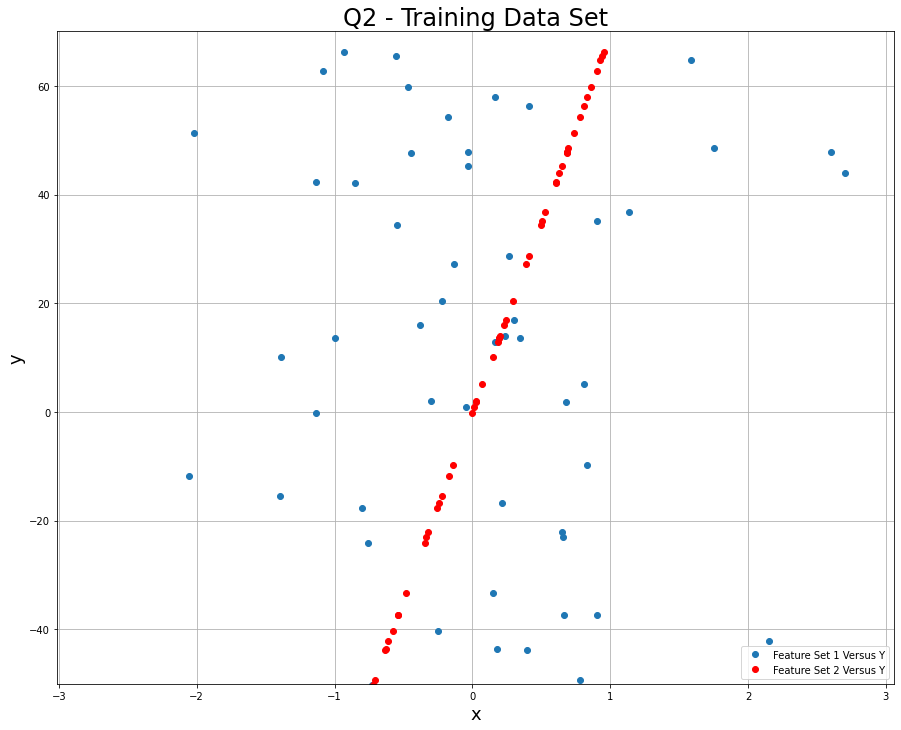

In [38]:
#Plot the initial training data.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Training Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_train[:, 0], y_train, 'o',  x_train[:, 1], y_train, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

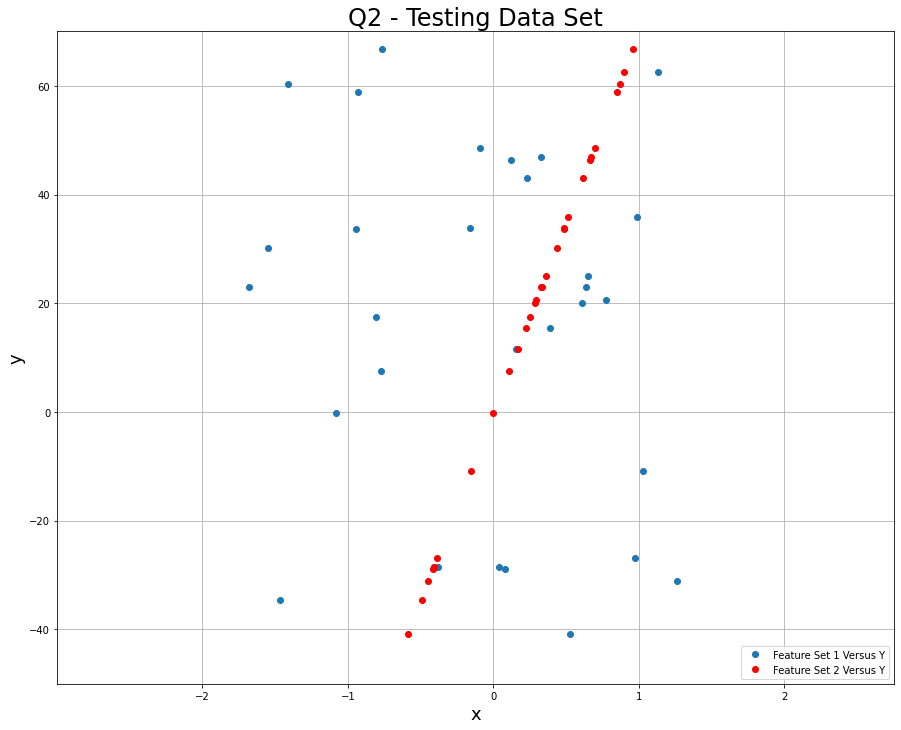

In [39]:
#Plot the initial testing data.
plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Testing Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_test[:, 0], y_test, 'o',  x_test[:, 1], y_test, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

### P2 - Training (Best MSE Convergence and Prediction Chart)

The following code in this section represents the code used to train the desired neural network with
the 1 - 1 - 1 architecture (1 input, 1 hidden, and 1 output layers).  

Current epochs is 0 @ loss = 5026.256549847509
Current epochs is 1 @ loss = 3674.0556956373375
Current epochs is 2 @ loss = 2922.569771376105
Current epochs is 3 @ loss = 2477.1195751077494
Current epochs is 4 @ loss = 2169.2363278610724
Current epochs is 5 @ loss = 1937.8074935581
Current epochs is 6 @ loss = 1754.0665143205363
Current epochs is 7 @ loss = 1601.003139768336
Current epochs is 8 @ loss = 1465.0933252464818
Current epochs is 9 @ loss = 1337.7441377402426
Current epochs is 10 @ loss = 1221.3902835158083
Current epochs is 11 @ loss = 1117.9441432667663
Current epochs is 12 @ loss = 1026.329665743157
Current epochs is 13 @ loss = 945.4106122448403
Current epochs is 14 @ loss = 874.026498296047
Current epochs is 15 @ loss = 810.9873739849213
Current epochs is 16 @ loss = 755.1518015366921
Current epochs is 17 @ loss = 705.4796853841665
Current epochs is 18 @ loss = 661.0552009104368
Current epochs is 19 @ loss = 621.0891458692489
Current epochs is 20 @ loss = 584.91362131969

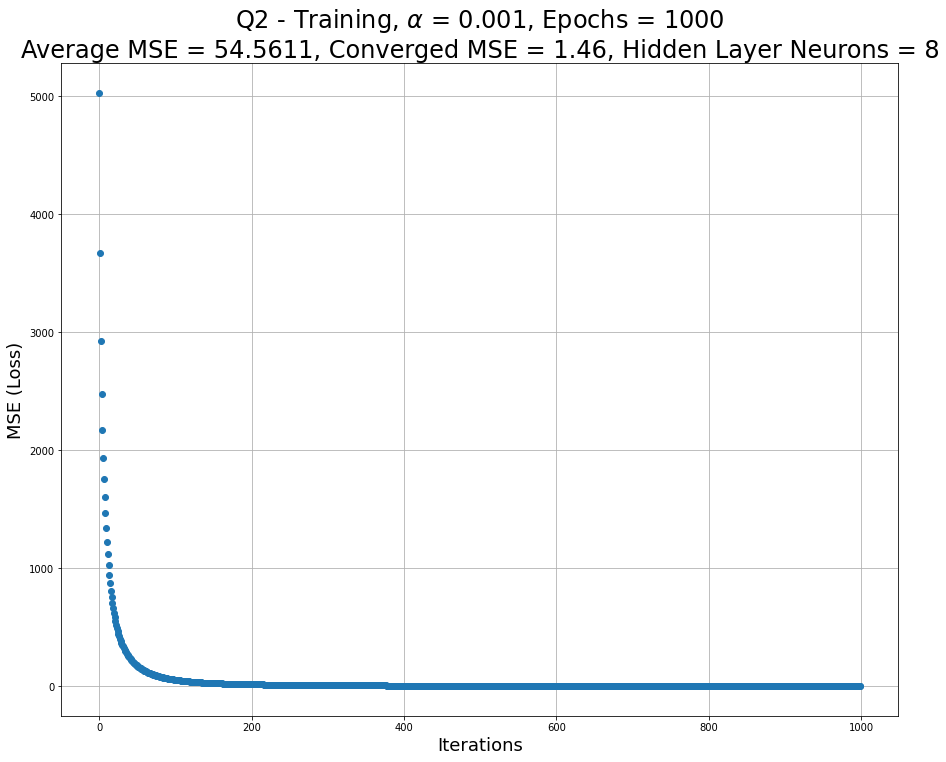

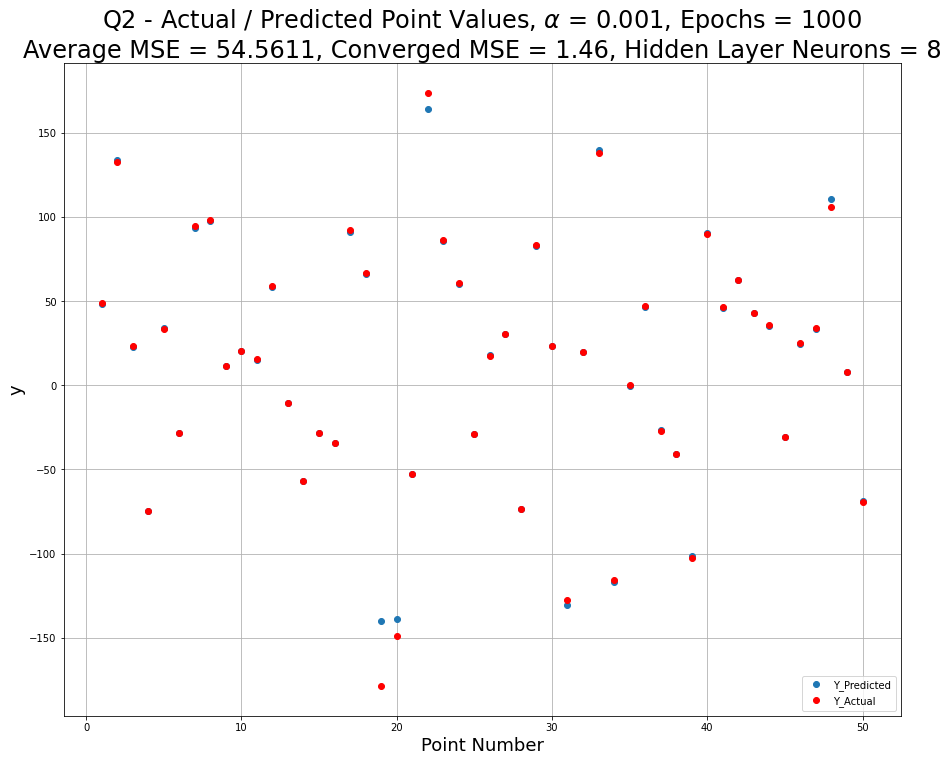

In [40]:
epochs = 1000
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')


### P2 - $\alpha$ Sweep

This section explores the effect of the varying the learning rate with respect to the MSE output. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


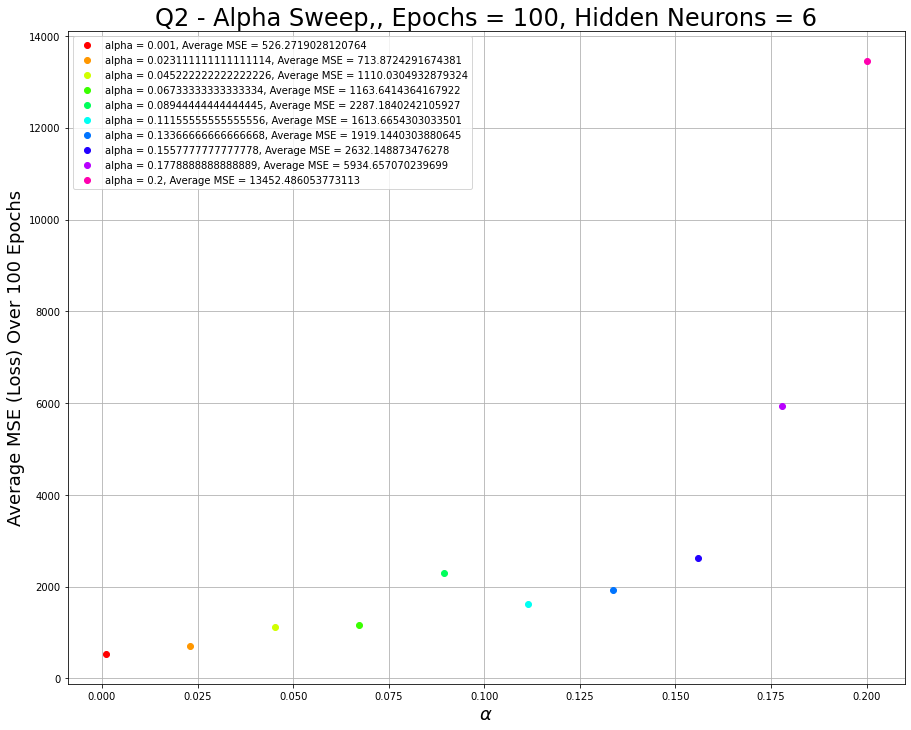

In [41]:
epochs = 100
hidden_layer_neurons = 6

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel(r'$\alpha$', fontsize=18)
plt.ylabel(f'Average MSE (Loss) Over {epochs} Epochs', fontsize=18)
plt.title(f'Q2 - Alpha Sweep,' f', Epochs = {epochs}, Hidden Neurons = {hidden_layer_neurons}', fontsize=24)

alpha_sweep = np.linspace(0.001, 0.2, 10)

#Used to cycle colors for the plots.
N = len(alpha_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for idx, alpha in enumerate(alpha_sweep):
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		#print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(alpha, np.mean(error), 'o', c=cmap(idx), label=f'alpha = {alpha}, Average MSE = {np.mean(error)}')

plt.grid()
plt.legend(loc='upper left')

As shown above, the Average MSE exponentially increases as the learning rate increases towards 1. As
the learning rate approaches 1, the Average MSE approaches infinity as the Neural Network becomes
unstable. 
***

### P2 - Number of Neurons Sweep

This section explores how the Neural Network reacts when the neurons in the hidden layer are
increased from 1 to 10. 

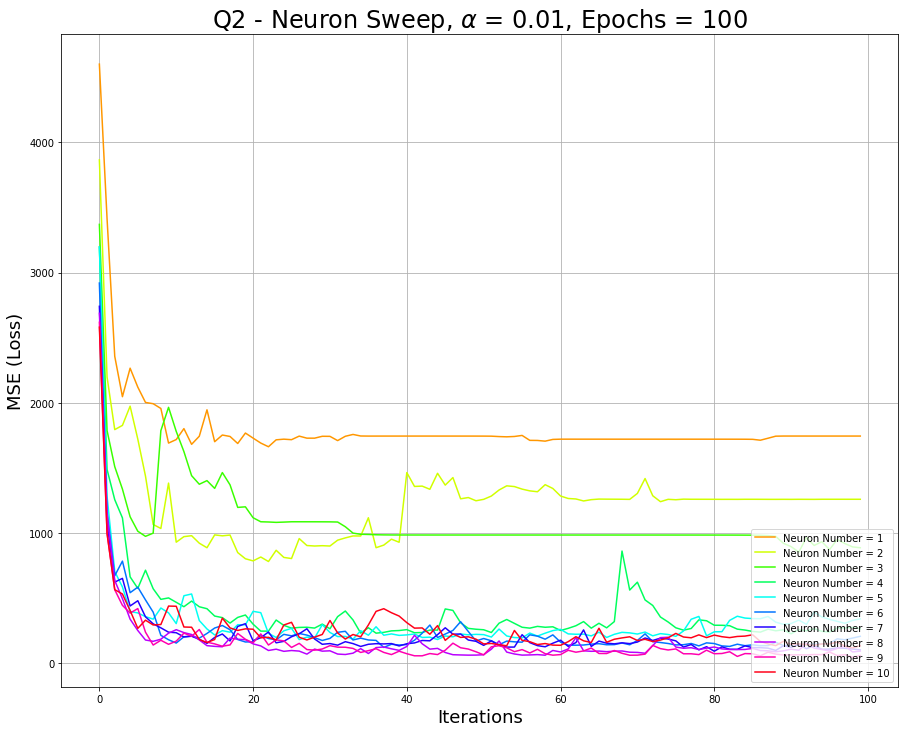

In [42]:
epochs = 100
alpha = 0.01

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)
plt.title(f'Q2 - Neuron Sweep,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}', fontsize=24)

neuron_sweep = [1,2,3,4,5,6,7,8,9,10]

#Used to cycle colors for the plots.
N = len(neuron_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for n in neuron_sweep:
	hidden_layer_neurons = n
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		#print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(iterations, error, '-', c=cmap(n), label=f'Neuron Number = {n}')

plt.grid()
plt.legend(loc='lower right')

result =[]
for i in range(x_test.shape[0]):
	out = x_test[i]
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	result.append(out)



As can be seen from the chart above, as the number of neurons increase in the hidden layer, the
Average MSE approaches 0 over the course of a number of iterations. The neuron number between 5 and
10 seemed to converge around the same MSE value and have a negligible impact of the overall results.
Hidden layers with less than 5 neurons seem to be unstable and seem to be caught in a local minima
instead of the absolute minima of the objective function. Also, with the number of neurons
increasing, the greater the chance the network becomes overfitted to the data and memorizes instead
of generalize. In terms of the results shown in section __P2 - Training (Best MSE Convergence and
Prediction Chart)__ , the data seemed to fit quite nicely and generalized to the majority of points
with minimal error in predictions. 
***

### P2 - Activation Function Experimentation

This section explores the effect of different activation functions of the performance of the Neural
Network. 

Current epochs is 0 @ loss = 2750.408336632145
Current epochs is 1 @ loss = 973.3157850744764
Current epochs is 2 @ loss = 753.4898728453778
Current epochs is 3 @ loss = 330.0518715293762
Current epochs is 4 @ loss = 199.5965071867822
Current epochs is 5 @ loss = 131.94085408233278
Current epochs is 6 @ loss = 98.6201930948877
Current epochs is 7 @ loss = 82.0677397017821
Current epochs is 8 @ loss = 75.99610308696616
Current epochs is 9 @ loss = 69.71082261538245
Current epochs is 10 @ loss = 60.35458612216225
Current epochs is 11 @ loss = 120.79861047100515
Current epochs is 12 @ loss = 145.49375527552883
Current epochs is 13 @ loss = 95.38277336027052
Current epochs is 14 @ loss = 84.11188834656501
Current epochs is 15 @ loss = 80.44534021616282
Current epochs is 16 @ loss = 57.429037200984325
Current epochs is 17 @ loss = 53.94651019180187
Current epochs is 18 @ loss = 38.20489892343236
Current epochs is 19 @ loss = 25.319509482511123
Current epochs is 20 @ loss = 22.98276273284875

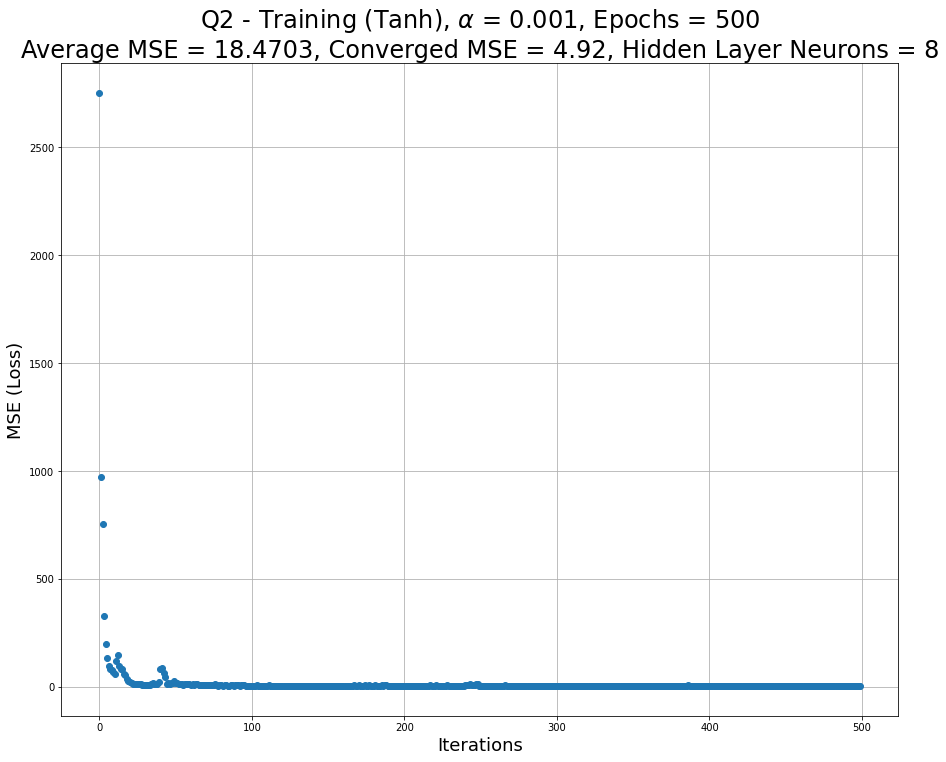

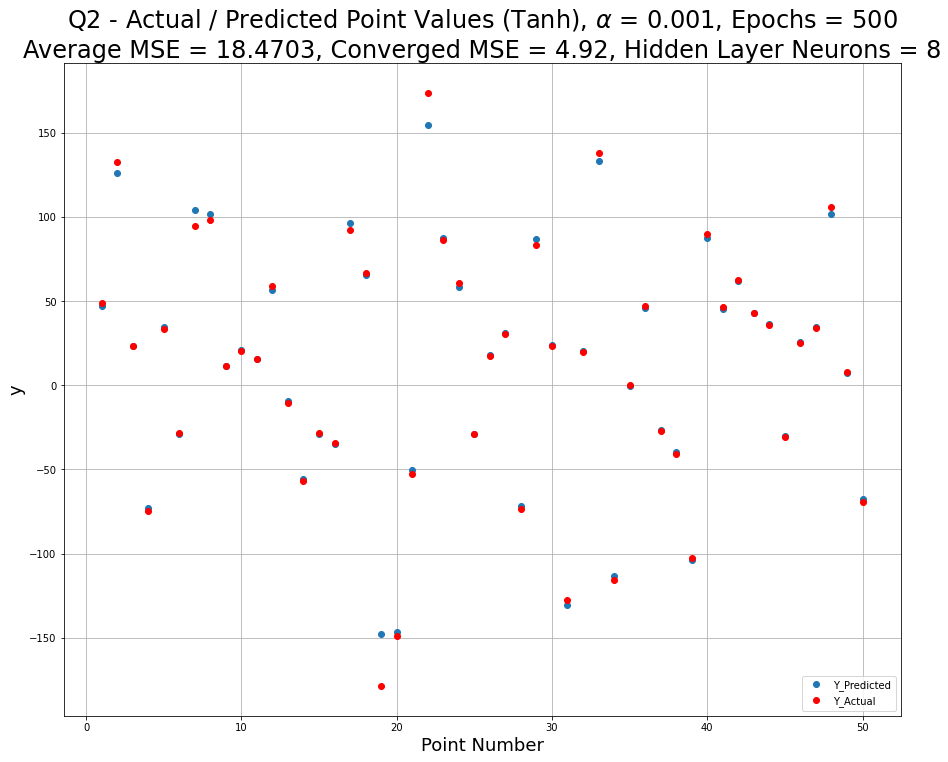

In [43]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.tanh, a2.tanhDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

Current epochs is 0 @ loss = 2717.202567955951
Current epochs is 1 @ loss = 1911.41860763514
Current epochs is 2 @ loss = 1684.957836767303
Current epochs is 3 @ loss = 1496.2304171151075
Current epochs is 4 @ loss = 1335.6842235499998
Current epochs is 5 @ loss = 1198.0198606157007
Current epochs is 6 @ loss = 1079.0620269627282
Current epochs is 7 @ loss = 975.8707910736927
Current epochs is 8 @ loss = 886.5046358350742
Current epochs is 9 @ loss = 808.7291446615517
Current epochs is 10 @ loss = 741.0030494289816
Current epochs is 11 @ loss = 681.7703766322091
Current epochs is 12 @ loss = 629.6265878430257
Current epochs is 13 @ loss = 583.4507448220927
Current epochs is 14 @ loss = 542.3245518475327
Current epochs is 15 @ loss = 505.66065869223036
Current epochs is 16 @ loss = 472.89343497543257
Current epochs is 17 @ loss = 443.3686468983378
Current epochs is 18 @ loss = 416.58694247113107
Current epochs is 19 @ loss = 392.1742626061554
Current epochs is 20 @ loss = 369.8206853449

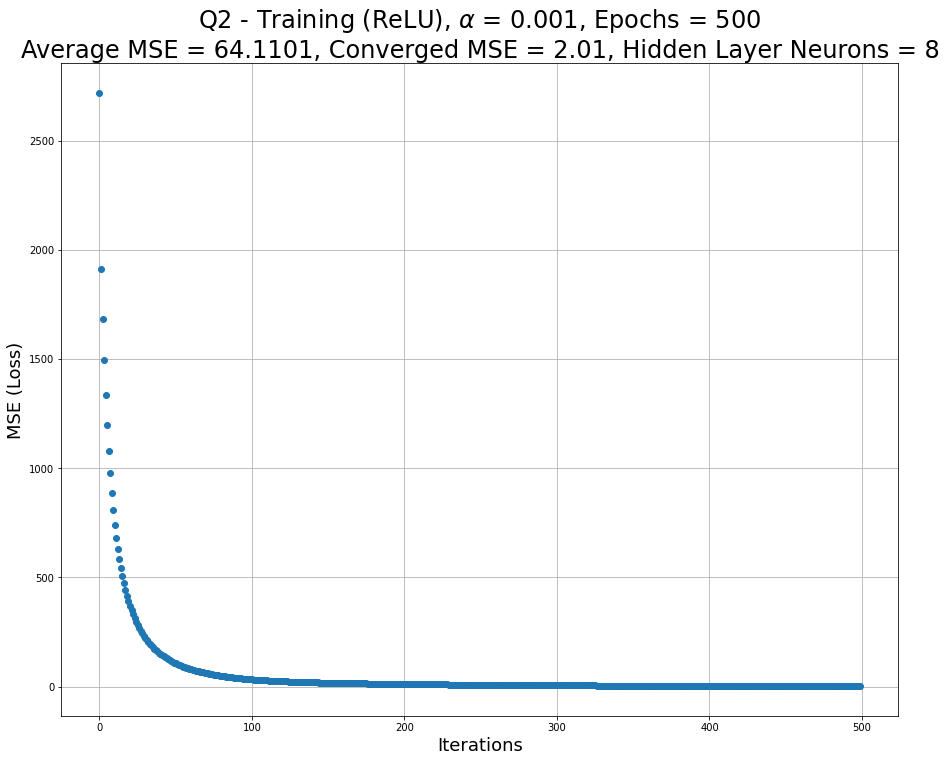

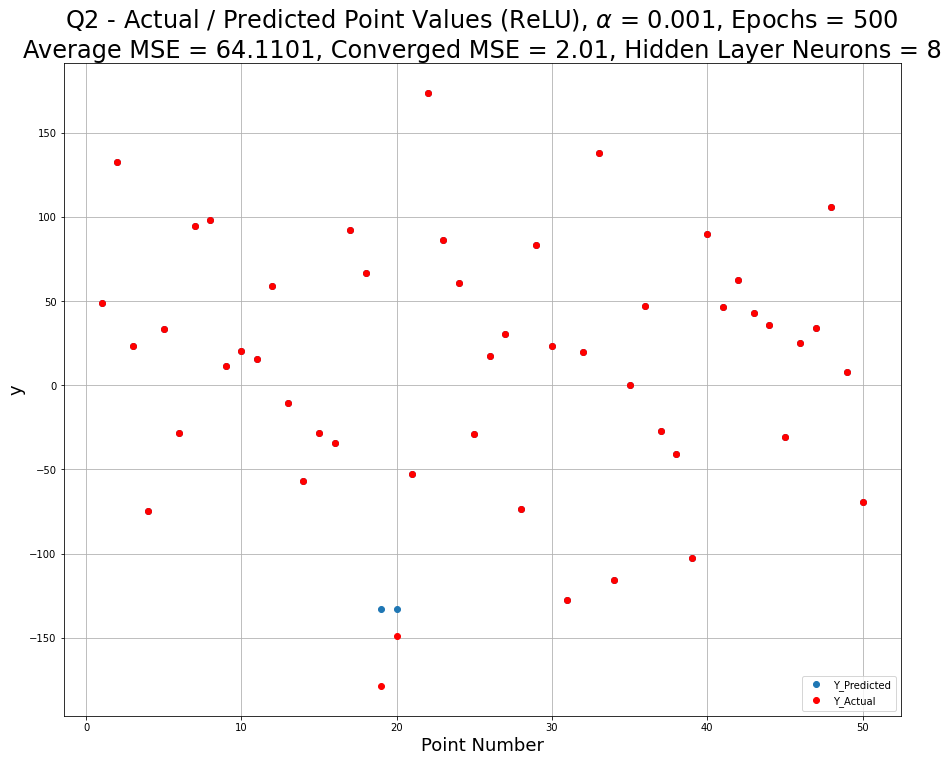

In [44]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.relu, a2.reluDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

As shown above, the TanH and ReLU activation functions were used to train the Neural Network with
the results shown above. In comparison of performance between Sigmoid, TanH, and ReLU, the TanH
function seemed to converge the fastest with the same learning rate and topology. In terms of the
function used, I believe this is due to TanH included negative values while the others omit the
negative values. Since the data set has values that are less than zero, the using the hyperbolic
tangent function seems to provide the best performance in relation to the input data. 
***

## P3 - Question Responses

1. A linear activation function would best serve the needs for the output layer since the output
   ranges between -40 and 65 per the test and training set. Majority of the activation functions
   would truncate or ignore the negative values of the output and produce incorrect predictions. 

2. There should only be a single neuron in the output layer due to the dimensions of the output being
   singular per training / test set. The data set is a regression is regressive in nature. No
   classification required. 

3. The best metrics achieved can be reviewed in the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section shown above. The Average MSE for 1000 epochs and $\alpha$ 0.001
   learning rate, hovers around 53 - 50 per run. 

4. Please refer to the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section above for more information regarding the plot
   between MSE loss versus epochs (iterations). 

5. The learning rate effects the performance of the neural network by the speed at which updates
   occur during gradient descent for backpropagation for each individual layer in the network. As
   the learning rate was increased, the performance decreased significantly and convergence was
   non-existent due to the extreme learning rates involved. A learning rate 0.18 or less seemed to
   perform the best in terms of convergence and accuracy in regards to predictions.   

6. 
   a. The update rule does not need to be changed or derived again due to the fact that only the
   weight and bias matrices change in accordance to the number of neurons in each hidden layer. The
   architecture of the network hasn't changed. 

   b. As seen in section __P2 - Number of Neurons Sweep__ , as the number of neurons increased, the
   MSE also generally improved. The true turning point is the transition between 4 and 5 neurons in
   the layer. As the number of neurons increased past 5, the performance of the networks saw
   diminishing improvements. Too many neurons could also cause overfitting to occur to the data set.

7. 
   a / b. The update rule would need to be changed in order to accommodate the derivative of the new
   activation function inside of the backpropagation function. However, this is the only change
   required to operate the neural network.  
   
   c. The results of utilizing different activations functions proved to be useful for the dataset.
   The Tanh function provided the fastest convergence with the same network architecture and
   learning rate. This is due to the Tanh function utilizing negative values while ReLU and sigmoid
   either ignore or truncate between 0 and 1 respectively. Due to the datasets utilizing negative
   values, the Tanh function makes sense to use to capture those feature characteristics. 